In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Pack the latitudes and longitueds as pairs by zipping them.
lat_lngs = zip(lats, lngs)

# Returns a zip object in memory.
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Import the citipy script from the citipy module.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination:

# Iterate through the coordinates' zipped tuple.
for coordinate in coordinates:
    # Get the name of the city nearest to the coordinates and save it in the "city" variable.
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

606

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list. Reference the index and the city in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # Check if the remainder of the index divided by 50 is equal to 0 and if the index >= 50    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city. 
    # Remove the blank spaces in the city name and concatenate it with '+'.
    # This will find the corresponding weather data for the city instead of finding 
    # the weather data for the first part of the city name.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record count, set count, and the city that is being processed.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count before the next city is processed.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON file and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        # pass is a general purpose statement to handle all errors encountered
        # and to alloow the program to continue
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | saint-joseph
Processing Record 6 of Set 1 | la rioja
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | westport
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | nouadhibou
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | saint anthony
Processing Record 20 of Set 1 | rafraf
Processing Record 21 of Set 1 | mackay
Processing Record 22 of Set 1 | atuona
Processing Record 23 of

Processing Record 38 of Set 4 | kavieng
Processing Record 39 of Set 4 | banjar
Processing Record 40 of Set 4 | blagoyevo
Processing Record 41 of Set 4 | knysna
Processing Record 42 of Set 4 | urumqi
Processing Record 43 of Set 4 | envira
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | eyl
Processing Record 46 of Set 4 | port-cartier
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | naze
Processing Record 49 of Set 4 | beyneu
Processing Record 50 of Set 4 | lagoa
Processing Record 1 of Set 5 | sarangani
Processing Record 2 of Set 5 | iki-burul
Processing Record 3 of Set 5 | lengshuijiang
Processing Record 4 of Set 5 | grimshaw
Processing Record 5 of Set 5 | augusto correa
Processing Record 6 of Set 5 | angoche
Processing Record 7 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 5 | tocopilla
Processing Record 9 of Set 5 | mar del plata
Processing Record 10 of Set 5 | mbaiki
Processing Record 11 of Set 5 | 

Processing Record 28 of Set 8 | rock sound
Processing Record 29 of Set 8 | babu
Processing Record 30 of Set 8 | hasaki
Processing Record 31 of Set 8 | katsuura
Processing Record 32 of Set 8 | faya
Processing Record 33 of Set 8 | yaan
Processing Record 34 of Set 8 | tutayev
Processing Record 35 of Set 8 | raudeberg
Processing Record 36 of Set 8 | bushehr
Processing Record 37 of Set 8 | moreira sales
Processing Record 38 of Set 8 | hetauda
Processing Record 39 of Set 8 | vao
Processing Record 40 of Set 8 | kaohsiung
Processing Record 41 of Set 8 | rincon
Processing Record 42 of Set 8 | felipe carrillo puerto
Processing Record 43 of Set 8 | najran
Processing Record 44 of Set 8 | shar
Processing Record 45 of Set 8 | benghazi
Processing Record 46 of Set 8 | harper
Processing Record 47 of Set 8 | balmazujvaros
Processing Record 48 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 49 of Set 8 | decatur
Processing Record 50 of Set 8 | marsabit
Processing Record 1 of Set 9 

Processing Record 20 of Set 12 | deh rawud
City not found. Skipping...
Processing Record 21 of Set 12 | kaliganj
Processing Record 22 of Set 12 | hecun
Processing Record 23 of Set 12 | abonnema
Processing Record 24 of Set 12 | waharoa
Processing Record 25 of Set 12 | altay
Processing Record 26 of Set 12 | figeac
Processing Record 27 of Set 12 | zhob
Processing Record 28 of Set 12 | manta
Processing Record 29 of Set 12 | liku
Processing Record 30 of Set 12 | ust-kulom
Processing Record 31 of Set 12 | lazaro cardenas
Processing Record 32 of Set 12 | tazovskiy
Processing Record 33 of Set 12 | mendoza
Processing Record 34 of Set 12 | venta
Processing Record 35 of Set 12 | chase
Processing Record 36 of Set 12 | progreso
Processing Record 37 of Set 12 | henties bay
Processing Record 38 of Set 12 | gazanjyk
Processing Record 39 of Set 12 | zhangjiakou
Processing Record 40 of Set 12 | aflu
City not found. Skipping...
Processing Record 41 of Set 12 | calvinia
Processing Record 42 of Set 12 | my

In [18]:
len(city_data)

559

In [19]:
# Convert the array of dictionaries in city_data to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,69.12,85,22,10.56,EC,2021-11-25 04:16:14
1,Hithadhoo,-0.6000,73.0833,82.44,71,76,18.50,MV,2021-11-25 04:16:15
2,Qaanaaq,77.4840,-69.3632,-2.33,48,0,7.16,GL,2021-11-25 04:16:15
3,Ostrovnoy,68.0531,39.5131,25.02,71,100,12.64,RU,2021-11-25 04:16:15
4,Saint-Joseph,-21.3667,55.6167,81.21,71,27,3.60,RE,2021-11-25 04:16:15
5,La Rioja,42.2500,-2.5000,38.98,100,100,5.70,ES,2021-11-25 04:13:44
6,Norman Wells,65.2820,-126.8329,-20.16,69,75,3.44,CA,2021-11-25 04:16:16
7,Lompoc,34.6391,-120.4579,59.63,69,1,5.75,US,2021-11-25 04:16:16
8,Avarua,-21.2078,-159.7750,78.85,69,60,11.50,CK,2021-11-25 04:16:15
9,Westport,41.1415,-73.3579,44.98,66,1,0.00,US,2021-11-25 04:15:30


In [20]:
# Reorder the columns in the city_data_df
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-11-25 04:16:14,-0.7393,-90.3518,69.12,85,22,10.56
1,Hithadhoo,MV,2021-11-25 04:16:15,-0.6000,73.0833,82.44,71,76,18.50
2,Qaanaaq,GL,2021-11-25 04:16:15,77.4840,-69.3632,-2.33,48,0,7.16
3,Ostrovnoy,RU,2021-11-25 04:16:15,68.0531,39.5131,25.02,71,100,12.64
4,Saint-Joseph,RE,2021-11-25 04:16:15,-21.3667,55.6167,81.21,71,27,3.60
5,La Rioja,ES,2021-11-25 04:13:44,42.2500,-2.5000,38.98,100,100,5.70
6,Norman Wells,CA,2021-11-25 04:16:16,65.2820,-126.8329,-20.16,69,75,3.44
7,Lompoc,US,2021-11-25 04:16:16,34.6391,-120.4579,59.63,69,1,5.75
8,Avarua,CK,2021-11-25 04:16:15,-21.2078,-159.7750,78.85,69,60,11.50
9,Westport,US,2021-11-25 04:15:30,41.1415,-73.3579,44.98,66,1,0.00


In [21]:
# Create the output file (CSV). Save the file to the weather_data folder with the file name cities.
output_data_file = "weather_data/cities.csv"

# Export the city_data_df into a CSV with the index label (or column A) header as "City_ID".
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

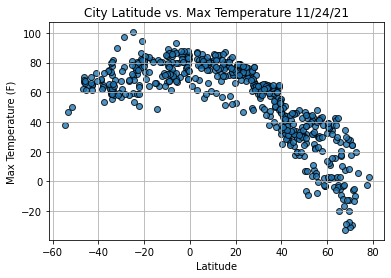

In [23]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Set the title, including today's date in the format MM/DD/YY
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))

# Set the x-axis and y-axis labels
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Show the grid
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

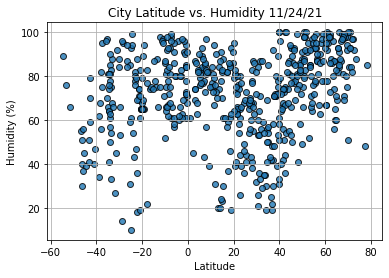

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Set the title, including today's date in the format MM/DD/YY
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))

# Set the x-axis and y-axis labels
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Show the grid
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

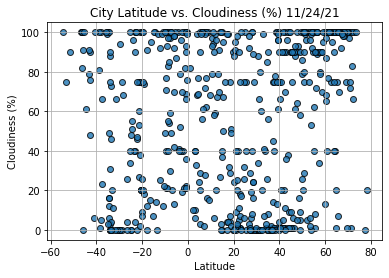

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Set the title, including today's date in the format MM/DD/YY
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))

# Set the x-axis and y-axis labels
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Show the grid
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

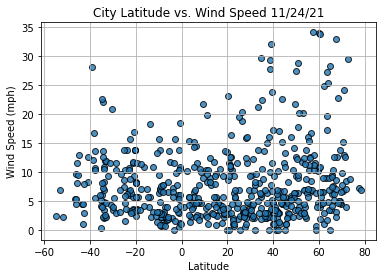

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Set the title, including today's date in the format MM/DD/YY
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))

# Set the x-axis and y-axis labels
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Show the grid
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()